# Softmax Regression

해당 repository 및 code들은 wikidocs에서 제공하는 'Pytorch로 시작하는 딥 러닝 입문'을 참고하였음을 밝힙니다. 해당 자료를 바탕으로 숙지한 개념과 추가적인 저의 생각을 기록할 계획입니다. 출처는 다음 사이트와 같습니다.<br><br>
* https://wikidocs.net/book/2788

# 01. 원-핫 인코딩(One-Hot Encoding)

범주형 데이터를 처리할 때 레이블을 표현하는 방법

아래는 세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩 했을 때 각 클래스 간의 제곱 오차가 균등함을 보여줍니다.<br>
<br>
((1,0,0) - (0,1,0))\*\*2 = (1-0)\*\*2 + (0-1)\*\*2 + (0-0)\*\*2 = 2<br>
((1,0,0) - (0,0,1))\*\*2 = (1-0)\*\*2 + (0-0)\*\*2 + (0-1)\*\*2 = 2<br>

다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대하여 유클리드 거리를 구해도 전부 유클리드 거리가 동일합니다. 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있습니다. 뒤에서 다시 언급되겠지만 이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.

# 02. 소프트맥스 회귀(Softmax Regression) 이해하기

* 이진 분류(Binary Classification): 로지스틱 회귀, 2개의 선택지 중에서 1개를 고르는 문제
* 다중 클래스 분류(Multi-Class Classification): 소프트맥스 회귀, 3개 이상의 선택지 중에서 1개를 고르는 문제

<img src='https://i.imgur.com/QaxsIhq.png' width='100%'>

### Cost Function: Cross Entropy Function

<img src='https://i.imgur.com/s9Ls2RK.png' width='100%'>

# 03. 소프트맥스 회귀의 비용 함수 구현하기

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

### 파이토치로 소프트맥스의 비용 함수 구현하기(로우-레벨)

In [ ]:
z = torch.FloatTensor([1,2,3])

In [ ]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
hypothesis.sum()

tensor(1.)

In [ ]:
z = torch.rand(3, 5, requires_grad=True)

In [ ]:
# 각 샘플에 대해서 소프트맥스 함수를 적용하여야 하므로
# 두 번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미에서 dim=1을 써줍니다.

hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward>)


In [ ]:
# 각 샘플에 대한 임의의 레이블 생성
# torch.randint(low=0, high, size): low부터 high까지의 정수값을 size의 크기로 랜덤 생성

y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [ ]:
# 각 레이블에 대해서 원-핫 인코딩 수행
# 모든 원소가 0의 값을 가진 3x5 텐서 생성

y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

y.unsqueeze(1)를 하면 (3,)의 크기를 가졌던 y 텐서는 (3x1) 텐서가 됩니다. 즉, 다시 말해서 y.unsqueeze(1)의 결과는 아래와 같습니다.

In [ ]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


그리고 scatter의 첫 번째 인자로 dim=1에 대해서 수행하라고 알려주고, 세 번째 인자에 숫자 1을 넣어줌으로써 두 번째 인자인 y.unsqueeze(1)이 알려주는 위치에 숫자 1을 넣도록 합니다. 앞서 연산 뒤에 \_를 붙이면 In-place Operation(덮어쓰기 연산)임을 배운 바 있습니다. 이에 따라서 y\_one\_hot의 최종 결과는 결국 아래와 같습니다.

In [ ]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


### 파이토치로 소프트맥스의 비용 함수 구현하기(하이-레벨)

F.softmax() + torch.log() = F.log_softmax()

In [ ]:
# Low level

torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward>)

In [ ]:
# High level

F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward>)

F.log_softmax() + F.nll\_loss() = F.cross_entropy()

In [ ]:
# Low level
# 첫 번째 수식

(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [ ]:
# 두 번째 수식

(y_one_hot * -F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [ ]:
# High level
# 세 번째 수식
# nll == Negative Log Likelihood

F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward>)

In [ ]:
# 네 번째 수식

F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward>)

F.cross\_entropy는 비용 함수에 소프트맥스 함수까지 포함하고 있음을 기억하고 있어야 구현 시 혼동하지 않습니다.

# 04. 소프트맥스 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

### 소프트맥스 회귀 구현하기(로우-레벨)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [ ]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [ ]:
# 모델 초기화

W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)      # Question: (1,3)이 올바른 설정 방법 아닌지?

# Optimizer 설정

optimizer = optim.SGD([W, b], lr=0.1)

In [ ]:
nb_epochs = 1000
for epoch in range(nb_epochs+ 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost : {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost : 1.098612
Epoch  100/1000 Cost : 0.761050
Epoch  200/1000 Cost : 0.689991
Epoch  300/1000 Cost : 0.643229
Epoch  400/1000 Cost : 0.604117
Epoch  500/1000 Cost : 0.568255
Epoch  600/1000 Cost : 0.533922
Epoch  700/1000 Cost : 0.500291
Epoch  800/1000 Cost : 0.466908
Epoch  900/1000 Cost : 0.433507
Epoch 1000/1000 Cost : 0.399962


### 소프트맥스 회귀 구현하기(하이-레벨)

In [ ]:
# 모델 초기화
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433506
Epoch 1000/1000 Cost: 0.399962


### 소프트맥스 회귀 nn.Module로 구현하기

In [ ]:
# 모델을 선언 및 초기화
# 4개의 특성을 가지고 3개의 클래스로 분류
# input_dim=4, output_dim=3

model = nn.Linear(4, 3)

Linear의 결과값을 가지고 cross_entropy function에 대입하기 때문에 위와 같이 모델을 설정한다.

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


### 소프트맥스 회귀 클래스로 구현하기

In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)   # output이 3!

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428281
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


# 05. 소프트맥스 회귀로 MNIST 데이터 분류하기

토치비전(torchvision)은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지입니다. 아래 링크는 torchvision에 어떤 데이터셋들(datasets)과 모델들(models) 그리고 어떤 전처리 방법들(transforms)을 제공하고 있는지 보여줍니다.<br>
<br>
링크: https://pytorch.org/docs/stable/torchvision/index.html<br>
<br>
자연어 처리를 위해서는 토치텍스트(torchtext)라는 패키지가 있습니다.

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
USE_CUDA = torch.cuda.is_available()    # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device('cuda' if USE_CUDA else 'cpu')    # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print('다음 기기로 학습합니다:', device)

다음 기기로 학습합니다: cuda


In [ ]:
# 랜덤 시드 고정
# for reproducibility

random.seed(777)
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# 하이퍼파라미터를 변수로 두기
# hyperparameters

training_epochs = 15
batch_size = 100

### MNIST 분류기 구현하기

In [ ]:
# MNIST dataset
# root: MNIST 데이터를 다운로드 받을 경로
# train: True를 주면 MNIST의 훈련 데이터를 리턴받으며, False를 주면 테스트 데이터를 리턴받는다.
# transform: 현제 데이터를 파이토치 텐서로 변환
# download: 해당 경로에 데이터가 없다면 다운로드 받겠다는 의미

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
# dataset loader
# dataset: 로드할 대상
# batch_size: 배치 크기
# shuffle: 매 에포크마다 미니 배치를 셔플할 것인지의 여부
# drop_last: 마지막 배치를 버릴 것인지를 의미

data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기는 100
                         shuffle=True,
                         drop_last=True)

drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해봅시다. 1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남습니다. 이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있습니다. 이때 마지막 배치를 버리려면 drop_last=True를 해주면 됩니다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줍니다.

In [ ]:
# MNIST data image of shape 28x28 = 784

linear = nn.Linear(784, 10, bias=True).to(device)

to() 함수는 연산을 어디서 수행할지를 정합니다. to() 함수는 모델의 매개변수를 지정한 장치의 메모리로 보냅니다. CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 to('cuda')를 해 줄 필요가 있습니다. 아무것도 지정하지 않은 경우에는 CPU 연산이라고 보면 됩니다.<br>
<br>
bias는 편향 b를 사용할 것인지를 나타냅니다. 기본값은 True이므로 굳이 할 필요는 없지만 명시적으로 True를 해주었습니다.

In [ ]:
# 비용 함수와 옵티마이저 정의

criterion = nn.CrossEntropyLoss().to(device)    # 내부적으로 소프트맥수 함수를 포함하고 있음
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

앞서 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy()를 사용하였으나 여기서는 torch.nn.CrossEntropyLoss()을 사용하고 있습니다. 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있습니다.

In [ ]:
for epoch in range(training_epochs):    # 앞서 training_epochs의 값은 15로 지정함
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28*28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0~9의 정수
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534769237
Epoch: 0002 cost = 0.359351158
Epoch: 0003 cost = 0.331293285
Epoch: 0004 cost = 0.316689461
Epoch: 0005 cost = 0.307015389
Epoch: 0006 cost = 0.300365269
Epoch: 0007 cost = 0.295039922
Epoch: 0008 cost = 0.290867776
Epoch: 0009 cost = 0.287298471
Epoch: 0010 cost = 0.284339339
Epoch: 0011 cost = 0.281994671
Epoch: 0012 cost = 0.279755563
Epoch: 0013 cost = 0.277896285
Epoch: 0014 cost = 0.276015371
Epoch: 0015 cost = 0.274435997
Learning finished


Accuracy: 0.8847000002861023
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


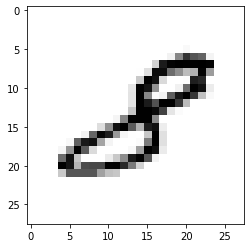

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.

with torch.no_grad():   # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

to(device)를 통해 GPU로 보내는 대상이 굉장히 모호하다. 익숙할때까지 반복해야 할 필요성이 있으며, 일단 하단에 to(device)의 대상을 정리해두도록 한다.<br>
<br>

* nn.Linear(784, 10, bias=True)
* nn.CrossEntropyLoss()
* X.view(-1, 28*28)
* Y
